# Testing the network class 

In this notebook, we check that the `BaseNetwork` class from `architectures.py` is working expectedly.

## Experiments
First we load the librairies

In [1]:
import sys, os 
sys.path.append(os.getcwd()+'/../src')
sys.path.append(os.getcwd()+'/../data')

import numpy
import matplotlib.pyplot as plt
% matplotlib inline
from IPython.display import clear_output

import architectures
import mnist
import utils

Then we load the data

In [2]:
X_train, y_train_lab = mnist.load_mnist(dataset='training', path=os.getcwd()+'/../data/mnist')
X_train = numpy.reshape(X_train, [X_train.shape[0], -1])
X_train = X_train/255.
y_train = utils.labels_to_categoricals(y_train_lab)

X_test, y_test_lab = mnist.load_mnist(dataset='testing', path=os.getcwd()+'/../data/mnist')
X_test = numpy.reshape(X_test, [X_test.shape[0], -1])
X_test = X_test/255.
y_test = utils.labels_to_categoricals(y_test_lab)

We instantiate the Mnist network

In [3]:
network = architectures.MnistNetwork()

We define the training callback:

In [4]:
def callback(history):
    plt.plot(history[:,0], history[:,1], label="Train")
    plt.plot(history[:,0], history[:,2], label="Test")
    plt.legend(loc=4)
    clear_output()
    plt.show()
    print("Elapsed Time: %.2f minutes"%(max(history[:,0])/60))

We train the network on training set until 0.98 accuracy on training set is reached

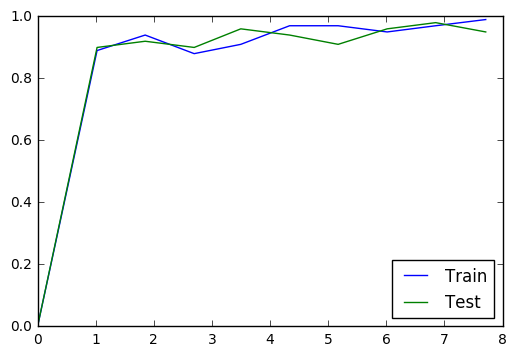

Elapsed Time: 0.13 minutes


In [5]:
network.train(X_train, y_train, X_test, y_test, criterion=0.98, callback=callback)

We plot `history` data

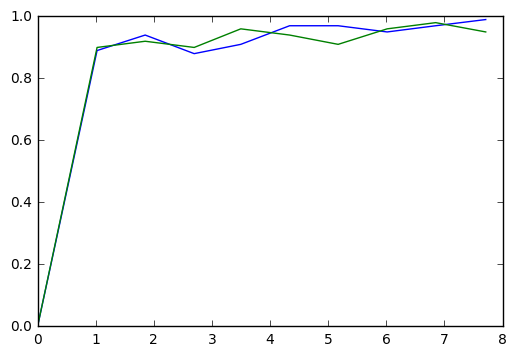

In [6]:
history = network.get_history()
plt.plot( history[:,0],history[:,1])
plt.plot(history[:,0], history[:,2])
plt.show()

We evaluate few test samples

In [7]:
network.evaluate(X_test[1:10])

array([[  2.66797375e-04,   2.63774372e-03,   9.93389249e-01,
          2.36481335e-03,   4.83488122e-07,   9.50525009e-06,
          1.10377313e-03,   2.25153318e-09,   2.27471450e-04,
          1.52489976e-09],
       [  4.27788145e-05,   9.90614176e-01,   5.55458653e-04,
          4.80559072e-04,   3.30951693e-03,   1.35580500e-04,
          7.63096497e-04,   2.90699722e-03,   1.17772748e-03,
          1.39857266e-05],
       [  9.94574130e-01,   5.93806249e-07,   4.49826184e-05,
          1.20905352e-05,   3.09923962e-06,   1.49299749e-05,
          5.29604172e-03,   1.74883662e-05,   4.81456436e-06,
          3.19352876e-05],
       [  2.16734747e-07,   1.24958390e-07,   1.25811630e-06,
          3.46417750e-07,   9.99732554e-01,   1.27270667e-07,
          1.65898255e-05,   1.01560865e-04,   1.81829409e-06,
          1.45362588e-04],
       [  5.26099439e-06,   9.97123063e-01,   3.63664185e-05,
          2.77740939e-04,   5.80726308e-04,   2.06415643e-06,
          2.23273382e-05

We test accuracy over test set

In [8]:
network.test(X_test, y_test)

0.95820000000000005

We save the network

In [9]:
network.save('mnist')

We create a new network object

In [10]:
network_new = architectures.MnistNetwork()

We test the performance of this fresh network over test set

In [11]:
network_new.test(X_test, y_test)

0.1074

We restore the learned weights

In [12]:
network_new.load('mnist')

We test again the performance of this restored network

In [13]:
network_new.test(X_test, y_test)

0.95820000000000005

We re plot the retrieved history

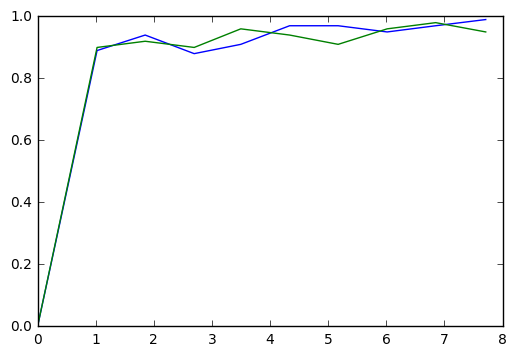

In [14]:
history = network.get_history()
plt.plot( history[:,0],history[:,1])
plt.plot(history[:,0], history[:,2])
plt.show()